In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('./dataset/kdd_cup99_10_percent.csv')

In [4]:
Y = data[['attack_type_digit']]
X = data.drop(['label','label_digit','attack_type','attack_type_digit','service'], axis=1)

In [5]:
# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
# 训练决策树模型
model = DecisionTreeClassifier(criterion='gini', random_state=42)
# 定义超参数搜索空间
param_grid = {
 'max_depth': [5, 10, 15, 20, None], # 树的最大深度
 'min_samples_split': [2, 5, 10], # 划分的最小样本数
 'min_samples_leaf': [1, 2, 4], # 叶子节点的最小样本数
 'ccp_alpha': [0.0, 0.01, 0.1, 0.5] # 剪枝参数
}
# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# 输出最佳超参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数重新训练模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, Y_train)

# 在测试集上进行预测
y_pred = best_model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

# 打印评估结果
print("Decision Tree Model Evaluation (With Hyperparameter Tuning)")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 将评估结果记录到字典中
metrics = {
 'Model': 'Decision Tree (Tuned)',
 'Accuracy': accuracy,
'Precision': precision,
 'Recall': recall,
 'F1 Score': f1
}

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Model Evaluation (With Hyperparameter Tuning)
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1 Score: 0.9994


<Figure size 1000x600 with 0 Axes>

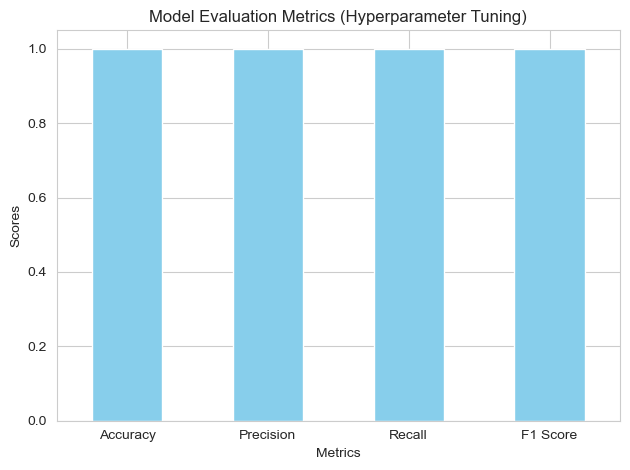

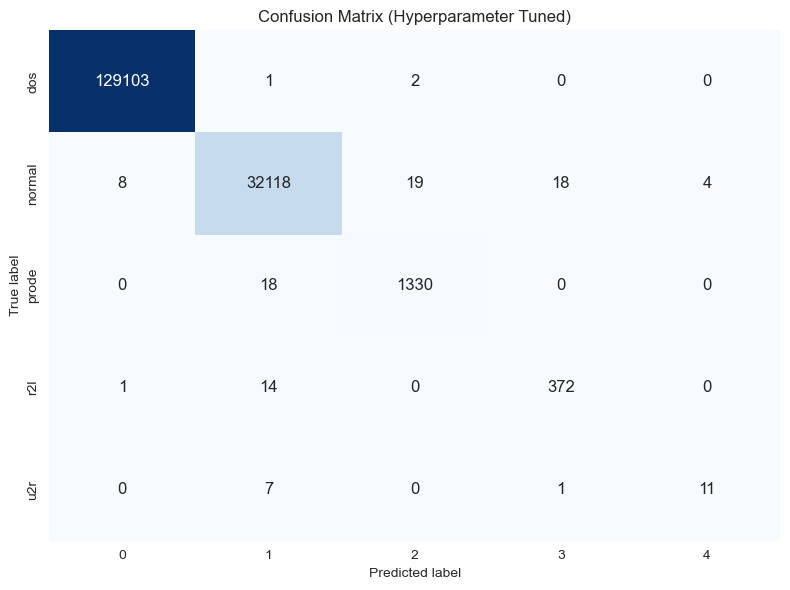

In [7]:
# 可视化各评价指标
metrics_df = pd.DataFrame([metrics])

# 设置图形大小
plt.figure(figsize=(10, 6))

# 设置柱状图
metrics_df.set_index('Model').T.plot(kind='bar', legend=False, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# 添加标签和标题
plt.title('Model Evaluation Metrics (Hyperparameter Tuning)')
plt.ylabel('Scores')
plt.xlabel('Metrics')

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 计算混淆矩阵
cm = confusion_matrix(Y_test, y_pred) 
labels = ['dos','normal','prode','r2l','u2r']
# 将混淆矩阵转换为 DataFrame，以便更好地显示
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})

# 添加标题和标签
plt.title('Confusion Matrix (Hyperparameter Tuned)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./picture/Decision_Tree_evaluation.png')
# 显示图表
plt.tight_layout()
plt.show()
